In [1]:
from sklearn.datasets import load_wine

In [2]:
df= load_wine()

In [3]:
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
import pandas as pd

In [5]:
x= pd.DataFrame(df.data)

In [6]:
y=df.target

In [7]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [8]:
xscal= sc.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split

In [25]:
xtest,xtrain,ytest,ytrain = train_test_split(xscal,y,test_size=0.3)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp =MLPClassifier()
params={
    'hidden_layer_sizes':[100,200],
    'max_iter':[100,300,500],
    'activation':('relu','tanh','logistics'),
    'solver':('adam','sgd'),
    'learning_rate':('constant','adaptive')
}


In [28]:
from sklearn.model_selection import GridSearchCV
gscv =GridSearchCV(mlp,params)

In [29]:
gscv.fit(xtrain,ytrain)

C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('relu', 'tanh', 'logistics'),
                         'hidden_layer_sizes': [100, 200],
                         'learning_rate': ('constant', 'adaptive'),
                         'max_iter': [100, 300, 500],
                         'solver': ('adam', 'sgd')})

In [30]:
gscv.best_estimator_

MLPClassifier(hidden_layer_sizes=100, max_iter=100)

In [31]:
gscv.best_score_

0.9618181818181819

In [32]:
gscv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'adam'}

In [33]:
gscv.score(xtest,ytest)

0.9758064516129032

In [34]:
from sklearn.metrics import classification_report
pred=gscv.predict(xtest)

In [35]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.94      0.97        51
           2       0.92      1.00      0.96        33

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



In [36]:
from imhist import imhist

<Axes: >

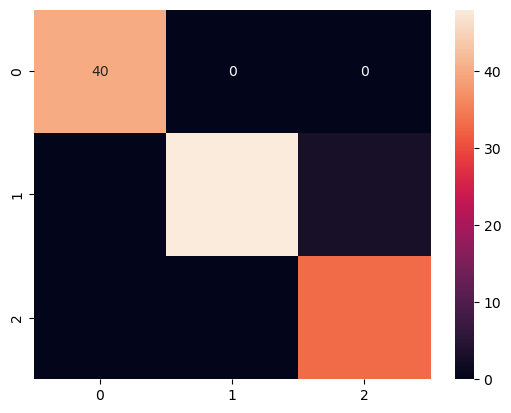

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cn= confusion_matrix(ytest,pred)
sns.heatmap(cn, annot=True)

In [39]:
from sklearn.datasets import load_wine


In [40]:
data = load_wine()

In [41]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [42]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
import pandas as pd

In [44]:
x= pd.DataFrame(data.data)
y=data.target

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc= sc.fit_transform(x)

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size=0.3)

In [47]:
from sklearn.neural_network import MLPClassifier
clf= MLPClassifier()
params={
    'hidden_layer_sizes': [100,200],
    'max_iter': [100,300,500],
    'activation': ('relu','tanh','sigmoid'),
    'solver': ('adam','sgd'),
    'learning_rate': ('constant','adaptive')
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
gscv= GridSearchCV(clf,params)

In [51]:
gscv.fit(xtrain,ytrain)

C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\aswin\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('relu', 'tanh', 'sigmoid'),
                         'hidden_layer_sizes': [100, 200],
                         'learning_rate': ('constant', 'adaptive'),
                         'max_iter': [100, 300, 500],
                         'solver': ('adam', 'sgd')})

In [53]:
gscv.best_score_

0.9916666666666666

In [54]:
pred= gscv.predict(xtest)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.92      0.96        26
           2       1.00      1.00      1.00        11

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [58]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(ytest,pred)

In [66]:
print(cn)

[[17  0  0]
 [ 2 24  0]
 [ 0  0 11]]


In [67]:
import seaborn as sns 

<Axes: >

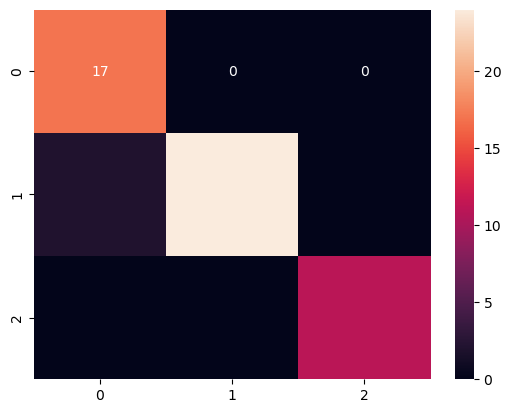

In [68]:
sns.heatmap(cn,annot=True)

In [69]:
gscv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'max_iter': 500,
 'solver': 'sgd'}